<a href="https://colab.research.google.com/github/johnGachihi/linear-regression-with-generalization/blob/master/LINEAR_REGRESSION_WITH_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression with L1:

\begin{align*}
  f(m, c) &= \frac{1}{N}\sum_{i=1}^{N} [y_i - (mx_i + c)]^2 - \lambda \sum_{j=1}^K ||m||_1
  \\
  &= \frac{1}{N}\sum_{i=1}^{N} [y_i - (mx_i + c)]^2 - \lambda \sum_{j=1}^K |m|
  \\
  \\
  \frac{\partial f(m,c)}{\partial m} &= \frac{1}{N} \sum_{i=1}^{N} \frac{\partial}{\partial m}[y_i - (mx_i + c)]^2 - \lambda \sum_{j=1}^K \frac{\partial}{\partial m} |m| &
  (m\text{ is a scalar thus we can remove the summation})
  \\
  &= -\frac{2}{N} \sum_{i=1}^{N} x_i[y_i - (mx_i + c)] - \lambda \frac{m}{|m|} &
  (\text{Our new D_m})
  \\
  \\
  \frac{\partial f(m,c)}{\partial c} &= \frac{1}{N} \sum_{i=1}^{N} \frac{\partial}{\partial c}[y_i - (mx_i + c)]^2 - \lambda \sum_{j=1}^K \frac{\partial}{\partial c} |m|
  \\
  &= -\frac{2}{N} \sum_{i=1}^{N} [y_i - (mx_i + c)] - 0 &
  (\text{Our D_c does not change})
  \\
  \\
\end{align*}

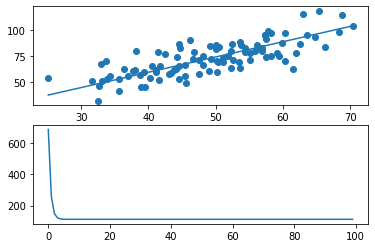

In [0]:
# LINEAR REGRESSION WITH L1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

dataset = pd.read_csv("data.csv", header=0, names=["size", "price"])
X = dataset["size"]
Y = dataset["price"]
N = X.size
L = 0.0001
lmbd=1.2

def mse(N, Y, Y_hat):
  return (1/N) * sum((Y-Y_hat)**2)

def gradient_descent_fit(X, Y):
  m = 0 # Y = mX + c
  c = 0
  epoch_error_list = []

#  for (int i = 0; i < 100; i++)
  for i in range(N):
    Y_hat = m*X + c
    D_m = (-2/N) * sum(X * (Y-Y_hat)) - lmbd*(m/abs(m))
    m = m - L*D_m
    D_c = (-2/N) * sum(Y-Y_hat)
    c = c - L*D_c

    epoch_error_list.append(mse(N, Y, Y_hat))

  return Y_hat, epoch_error_list

(Y_hat, epoch_error_list) = gradient_descent_fit(X, Y)

_, (best_fit_axes, error_axes) = plt.subplots(2)

best_fit_axes.scatter(X, Y)
best_fit_axes.plot([min(X), max(X)], [min(Y_hat), max(Y_hat)])

error_axes.plot(range(N), epoch_error_list)

plt.show()
